In [2]:
import numpy as np


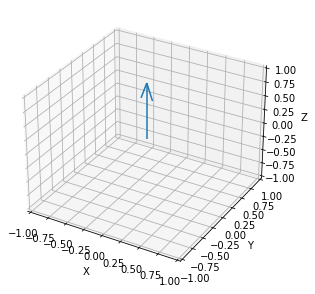

In [7]:
v = np.array([0,0,1])
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
lim = 1
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))
ax.set_zlim((-lim, lim))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


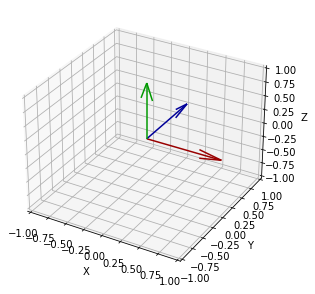

In [39]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
lim = 1
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))
ax.set_zlim((-lim, lim))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
id_basis = np.eye(3)
# RBG
RED = (.6,0,0)
GREEN = (0,.6,0)
BLUE = (0,0,.6)
"""
let [color_1, color_2, ..., color_n] be the list you obtained after step 2, you should specify colors=[color_1, color_2, ..., color_n, color_1, color_1, color_2, color_2, ..., color_n, color_n]since actually the "-" part (consisting of 1 line) of all the non-zero arrows "->" wil be drawn first, then comes the ">" part (consisting of 2 lines).
"""

basis_colors = [RED,BLUE,GREEN,RED,RED,BLUE,BLUE,GREEN,GREEN]
plt.quiver(*np.zeros((3,3)),*np.eye(3),colors=basis_colors)



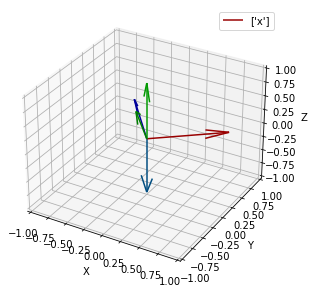

In [87]:
from utils.utils import get_rotation_matrix_from_yaw_pitch_roll
from matplotlib import pyplot as plt
import numpy as np
from math import pi
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(111, projection="3d")
lim = 1
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))
ax.set_zlim((-lim, lim))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
def plot_vector(ax,v=[0,0,-1],origin=np.array([0,0,0]),color=(0,.5,0)):
    ax.quiver(*origin,*v,color=color)
def plot_basis(ax,R=np.eye(3),linestyle='-'):
    # RBG
    RED = (.6,0,0)
    GREEN = (0,.6,0)
    BLUE = (0,0,.6)
    """
    let [color_1, color_2, ..., color_n] be the list you obtained after step 2, you should specify colors=[color_1, color_2, ..., color_n, color_1, color_1, color_2, color_2, ..., color_n, color_n]since actually the "-" part (consisting of 1 line) of all the non-zero arrows "->" wil be drawn first, then comes the ">" part (consisting of 2 lines).
    """
    basis_colors = [RED,BLUE,GREEN,RED,RED,BLUE,BLUE,GREEN,GREEN]
    ax.quiver(*np.zeros((3,3)),*R,colors=basis_colors,label=['x'],linestyle=linestyle)
    ax.legend()
def plot_rotation(ax,R):
    plot_basis(ax=ax,R=np.eye(3),linestyle='--')
    plot_basis(ax=ax,R=R)
def get_rotation_matrix_to_rotate_vector_a_to_vector_b(a,b=np.array([0,0,-1])):
    v = np.cross(a,b)
    s = np.linalg.norm(v)
    c = np.dot(a,b)
    I = np.eye(3,3)
    v_x = np.array([[0,-v[2],v[1]],
                    [v[2],0,-v[0]],
                    [-v[1],v[0],0]])
    R = I + v_x + (v_x @ v_x * (1/(1+c)))
    return R

# plot_basis(ax)
# TODO *args
a = [0,1,0]
b = [0,0,-1]
# plot_vector(ax,a,color=(1,0,0))
plot_vector(ax,b,color=(0,.3,.5))
R = get_rotation_matrix_from_yaw_pitch_roll(roll=.5,pitch=-.2,yaw=pi/5)

z = R.T[2]
plot_vector(ax,z)
R_tilt = get_rotation_matrix_to_rotate_vector_a_to_vector_b(-z,b)
# z2 = R @ z
R = R_tilt @ R
plot_basis(ax,R)
# plot_vector(ax,z2)


In [110]:
from pytransform3d.rotations import extrinsic_euler_xyz_from_active_matrix,active_matrix_from_extrinsic_euler_xyz
R = get_rotation_matrix_from_yaw_pitch_roll(roll=.5,pitch=-.2,yaw=pi/5)
R

array([[ 0.79289052, -0.59288665,  0.14074817],
       [ 0.57606868,  0.65399434, -0.49034303],
       [ 0.19866933,  0.46986895,  0.86008934]])

In [111]:
S = active_matrix_from_extrinsic_euler_xyz([.5,-.2,pi/5])
S

array([[ 0.79289052, -0.59288665,  0.14074817],
       [ 0.57606868,  0.65399434, -0.49034303],
       [ 0.19866933,  0.46986895,  0.86008934]])

In [112]:
extrinsic_euler_xyz_from_active_matrix(S)

array([ 0.5       , -0.2       ,  0.62831853])

In [97]:
pi

0.6283185307179586